In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import expon
import matplotlib as mpl
import pandas as pd

In [2]:
import scipy as sp

## Exercise 1b

In [18]:
array = np.array([1,2,3])
transition_matrix = (np.array([[0.2, 0.7, 0.1], [0.2, 0.5, 0.3], [0.2, 0.4, 0.4]]))

x = [1]
x_iteration = 1

for i in range(30):
    if x_iteration==1:
        x_iteration=np.random.choice(array, p = transition_matrix[0])
        x.append(x_iteration)
    if x_iteration==2:
        x_iteration=np.random.choice(array, p = transition_matrix[1])
        x.append(x_iteration)
    if x_iteration==3:
        x_iteration=np.random.choice(array, p = transition_matrix[2])
        x.append(x_iteration)

In [9]:
#np.transpose(pi)@transition_matrix

matrix([[0.2, 0.7, 0.1]])

In [19]:
x

[1,
 2,
 3,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 3,
 2,
 3,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 1]

## Exercise 2b

In [3]:
array = np.array([1,2,3])
transition_matrix = (np.array([[0.2, 0.7, 0.1], [0.2, 0.5, 0.3], [0.2, 0.4, 0.4]]))

pi = [0,0,1]
result_2b = np.transpose(pi)@np.linalg.matrix_power(transition_matrix, 100)
result_2b

array([0.2       , 0.51111111, 0.28888889])

We can see we got the same results as in the handwritten part

In [15]:
x_0 = [0,0,1]
list_x0 = []
x_1 = [0,1,0]
list_x1 = []

def norm2(x):
    return(np.sum(x**2) ** 0.5)

for i in range(50):
    #Source consulted: https://stackoverflow.com/questions/35213592/numpy-calculate-square-of-norm-2-of-vector
    iterate_0 = (norm2((np.transpose(x_0)@np.linalg.matrix_power(transition_matrix, i))- (np.transpose(x_0)@np.linalg.matrix_power(transition_matrix, 100)))**2)
    list_x0.append([i,iterate_0])
    iterate_1 = (norm2((np.transpose(x_1)@np.linalg.matrix_power(transition_matrix, i))- (np.transpose(x_1)@np.linalg.matrix_power(transition_matrix, 100)))**2)
    list_x1.append([i,iterate_1])
    
df_x0 = pd.DataFrame(list_x0)
df_x0=df_x0.rename(columns={0: "i", 1: "(||π_i − π_∞||)^2"})
df_x1 = pd.DataFrame(list_x1)
df_x1=df_x1.rename(columns={0: "i", 1: "(||π_i − π_∞||)^2"})

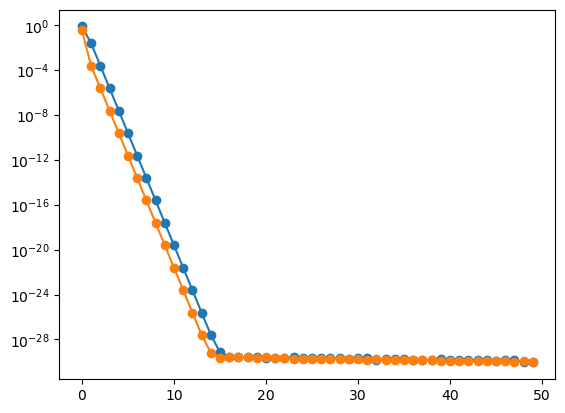

In [16]:
plt.plot(df_x0['i'], df_x0["(||π_i − π_∞||)^2"],'o-');
plt.plot(df_x1['i'], df_x1["(||π_i − π_∞||)^2"],'o-');
plt.yscale('log')

We can see that after around 14 iterations both cases converge, and that before the norm square of [0,0,1] is greater than the norm square of [0,1,0]

## Exercise 3 a

We create a function from the code of question 1a changed

In [27]:
def get_markov_chain(input_array, input_transition_matrix, x_start):
    time_saved = []
    for i in range(10000):
        x_iteration = x_start
        time = 0
        while x_iteration!=3:
            if x_iteration==1:
                x_new=np.random.choice(input_array, p = input_transition_matrix[0])
            elif x_iteration==2:
                x_new=np.random.choice(input_array, p = input_transition_matrix[1])
            elif x_iteration==3:
                x_new=np.random.choice(input_array, p = input_transition_matrix[2])
            time+=1
            x_iteration=x_new
        time_saved.append(time)
    return time_saved

In [28]:
array = np.array([1,2,3])
transition_matrix = (np.array([[0.2, 0.7, 0.1], [0.2, 0.5, 0.3], [0.2, 0.4, 0.4]]))

In [29]:
x_1 = get_markov_chain(array, transition_matrix,1)
x_2 = get_markov_chain(array, transition_matrix,2)

In [26]:
np.mean(x_1)

4.6017

In [25]:
np.mean(x_2)

3.8665

We can see we got the same results as in the handwritten part

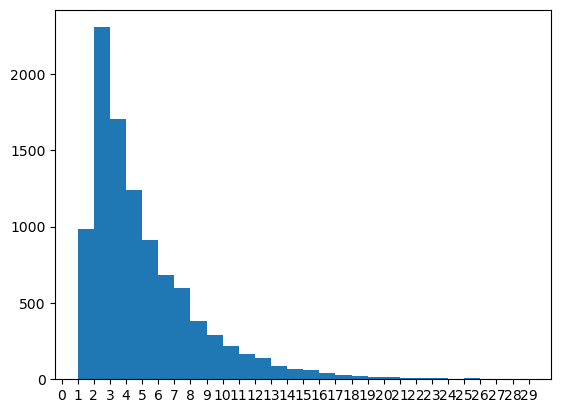

In [36]:
plt.hist(x_1, bins=np.arange(1,30,1)); #, bins=100, density=True
plt.xticks(range(30));

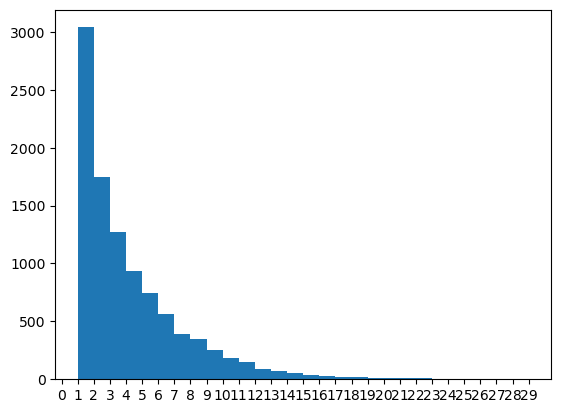

In [38]:
plt.hist(x_2, bins=np.arange(1,30,1)); #, bins=100, density=True
plt.xticks(range(30));

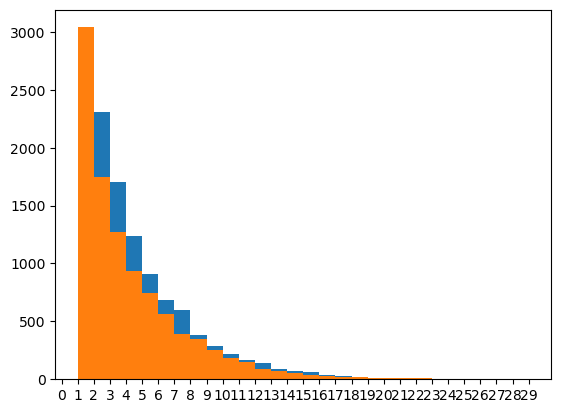

In [40]:
plt.hist(x_1, bins=np.arange(1,30,1)); #, bins=100, density=True
plt.hist(x_2, bins=np.arange(1,30,1)); #, bins=100, density=True
plt.xticks(range(30));